In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Flatten,
    LeakyReLU,
    Dense,
    Dropout,
)
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

import os

In [2]:
train_path = (
    "C:/Users/DELL/OneDrive/Documents/GitHub/facial-expression-emotion/fer2013/train"
)
test_path = (
    "C:/Users/DELL/OneDrive/Documents/GitHub/facial-expression-emotion/fer2013/test"
)

In [3]:
x = plt.imread(
    "C:/Users/DELL/OneDrive/Documents/GitHub/facial-expression-emotion/fer2013/test/happy/PrivateTest_6908247.jpg"
)
x.shape

(48, 48)

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)

In [5]:
train = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    class_mode="sparse",
    seed=1,
    color_mode="grayscale",
    batch_size=128,
)
test = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    class_mode="sparse",
    seed=1,
    color_mode="grayscale",
    batch_size=128,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
dir(train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 '_warn_if_super_not_called',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'max_queue_size',
 'n',
 'num_classes',
 'on_epoch_end',
 'reset',
 '

In [7]:
print(train.class_indices)
emotion_dict = {
    0: "Angry",
    1: "Disgusted",
    2: "Fearful",
    3: "Happy",
    4: "Neutral",
    5: "Sad",
    6: "Surprised",
}

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [8]:
# Get the next batch from the train iterator
x, y = next(train)

# Print the shapes of x and y
print(x.shape, y.shape)

# Reset the iterator to the beginning of the dataset (optional)
train.reset()

(128, 48, 48, 1) (128,)


In [9]:
model = Sequential(
    [
        Conv2D(32, (3, 3), input_shape=(48, 48, 1), padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(64, (3, 3), padding="same"),
        LeakyReLU(),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(128, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(128, (3, 3), padding="same"),
        LeakyReLU(),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        #     tf.keras.layers.GlobalAveragePooling2D(),
        #     Dropout(0.4),
        Dense(128, activation="relu"),
        Dropout(0.4),
        #     Dense(64, activation="relu"),
        Dense(len(train.class_indices), activation="softmax"),
    ]
)
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 48, 48, 32)        │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 24, 24, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 24, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)       │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 1,025,767 (3.91 MB)

 Trainable params: 1,025,319 (3.91 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
net = Sequential(name="DCNN")

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5, 5),
        input_shape=(48, 48, 1),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_1",
    )
)
net.add(BatchNormalization(name="batchnorm_1"))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5, 5),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_2",
    )
)
net.add(BatchNormalization(name="batchnorm_2"))

net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_1"))
net.add(Dropout(0.4, name="dropout_1"))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_3",
    )
)
net.add(BatchNormalization(name="batchnorm_3"))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_4",
    )
)
net.add(BatchNormalization(name="batchnorm_4"))

net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_2"))
net.add(Dropout(0.4, name="dropout_2"))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_5",
    )
)
net.add(BatchNormalization(name="batchnorm_5"))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        activation="elu",
        padding="same",
        kernel_initializer="he_normal",
        name="conv2d_6",
    )
)
net.add(BatchNormalization(name="batchnorm_6"))

net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_3"))
net.add(Dropout(0.5, name="dropout_3"))

net.add(Flatten(name="flatten"))

net.add(Dense(128, activation="elu", kernel_initializer="he_normal", name="dense_1"))
net.add(BatchNormalization(name="batchnorm_7"))

net.add(Dropout(0.6, name="dropout_4"))

net.add(Dense(7, activation="softmax", name="out_layer"))

net.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

net.summary()

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)        │      1,664 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)        │    102,464 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)       │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)       │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)       │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)       │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 9216)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │  1,179,776 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm_7                     │ (None, 128)               │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [12]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [13]:
model.fit(train, validation_data=test, epochs=20, callbacks=callbacks)

Epoch 1/20


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.2024 - loss: 2.2824 - val_accuracy: 0.0155 - val_loss: 4.2932 - learning_rate: 1.0000e-04
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.2253 - loss: 1.8465 - val_accuracy: 0.2552 - val_loss: 3.0399 - learning_rate: 1.0000e-04
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.2358 - loss: 1.8287 - val_accuracy: 0.2570 - val_loss: 2.0219 - learning_rate: 1.0000e-04
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.2565 - loss: 1.8058 - val_accuracy: 0.2832 - val_loss: 1.8252 - learning_rate: 1.0000e-04
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 24517s 109s/step - accuracy: 0.2764 - loss: 1.7869 - val_accuracy: 0.2955 - val_loss: 1.7934 - learning_rate: 1.0000e-04
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.2916 - loss: 1.7526 - val_accuracy: 0.2814 - val_loss: 2.0374 - learning_rate: 1.0000e-04
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 

In [14]:
model.save("facialmodel.h5")

In [15]:
x, y = next(test)
preds = model.predict(x)
idx = np.argmax(preds, axis=1)
# idx.shape
print("correct prediction:", np.sum((y == idx) * 1) / 128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
correct prediction: 0.4140625


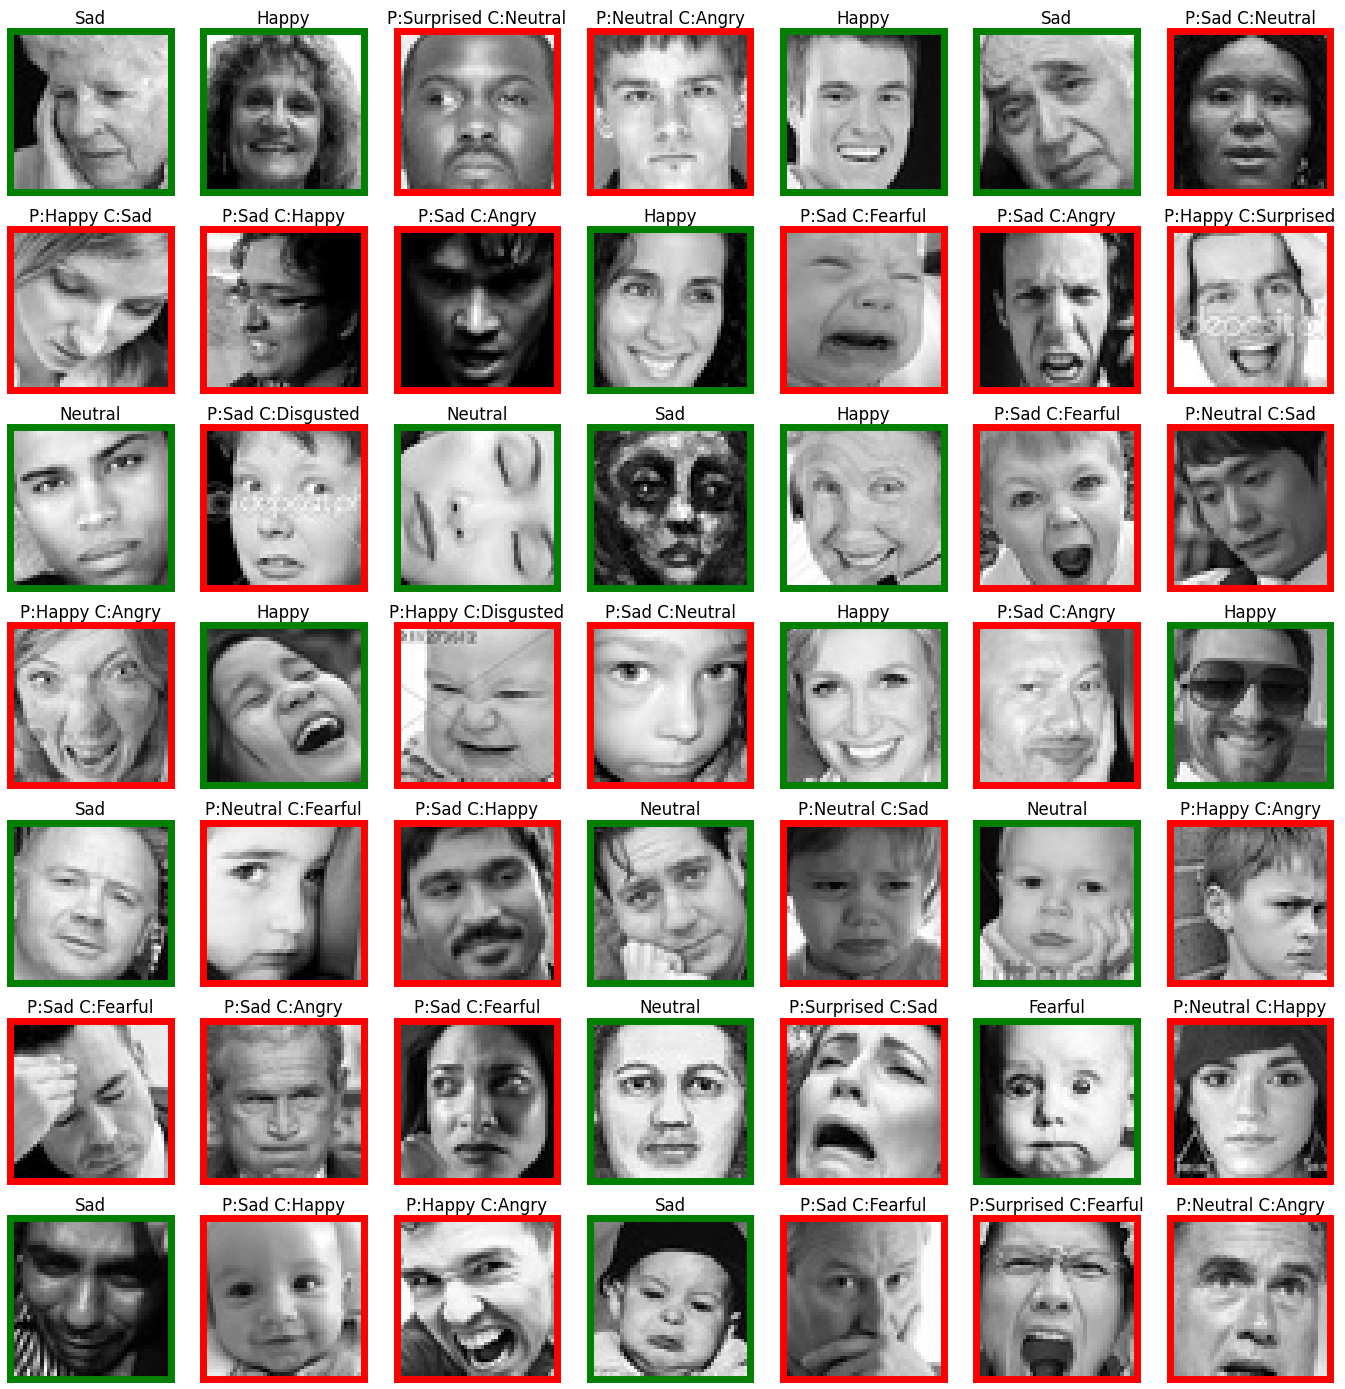

In [16]:
fig = plt.figure(1, (14, 14))

k = 0
for j in range(49):
    px = x[j]
    k += 1
    ax = plt.subplot(7, 7, k)
    ax.imshow(px, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])

    if emotion_dict[y[j]] == emotion_dict[idx[j]]:
        for axis in ["top", "bottom", "left", "right"]:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color("green")
        ax.set_title(emotion_dict[idx[j]])

    else:
        for axis in ["top", "bottom", "left", "right"]:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color("red")
        ax.set_title("P:" + emotion_dict[idx[j]] + " C:" + emotion_dict[y[j]])
    plt.tight_layout()

In [17]:
test.reset()